In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

Сопряженное распределение к бернуллиевскому распределению - бета-распределение с параметрами


$\alpha = \alpha_0 + \sum_{i=1}^n x_i,\, \beta = \beta_0 + n - \sum_{i=1}^n x_i$, где $\alpha_0, \beta_0$ — параметры арпорного распределения.

Тогда,

$\widehat{\theta}_n = \frac{\alpha}{\alpha + \beta}$.

Изучим поведение бета-распределения.

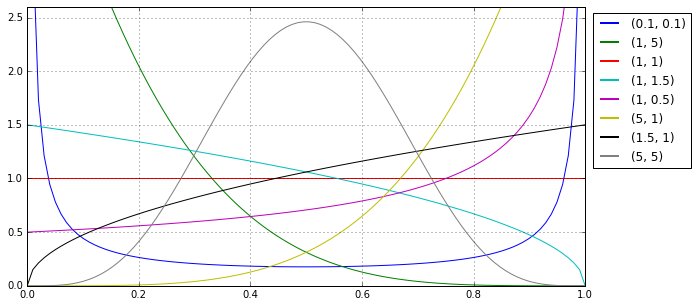

In [3]:
beta_par = [(0.1, 0.1), (1, 5), (1, 1), (1, 1.5),  (1, 0.5), (5, 1),  (1.5, 1), (5, 5)]
plt.figure(figsize=(10, 5))
colors_array = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'grey']
x = np.linspace(0, 1, 100)
for i in range(8):
    plt.plot(x, sps.beta.pdf(x, a=beta_par[i][0], b=beta_par[i][1]), label=beta_par[i], color=colors_array[i])
plt.ylim(0, 2.6)
plt.grid()
leg = plt.legend(bbox_to_anchor=(1.2, 1))
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)

Рассмотрим три вида априорного знания о монете:
1. Монета скорее честна,
2. Монета нечестна,
3. монета нечестна с перевесом в сторону герба.

In [60]:
p1 = 0.53
p2 = 0.15
p3 = 0.87
sample_1 = sps.bernoulli.rvs(size=20, p=p1)
sample_2 = sps.bernoulli.rvs(size=20, p=p2)
sample_3 = sps.bernoulli.rvs(size=20, p=p3)

Из построенных графиков плотностей бета-распределения видим, что 

для случая 1 нужно рассмотреть распределение, у которого наибольшая плотность в точке 0.5 (на графике - (5, 5));

для случая 2 нужно рассмотреть распределение, у которого наименьшая плотность в точке 0. 5 (на графике - (0.1, 0.1));

для случая 3 нужно рассмотреть распределения, у которого наибольшая плотность достигается около точки 1 (на графике - (5, 1));

Постоим нужные плотности, подобрав параметры:

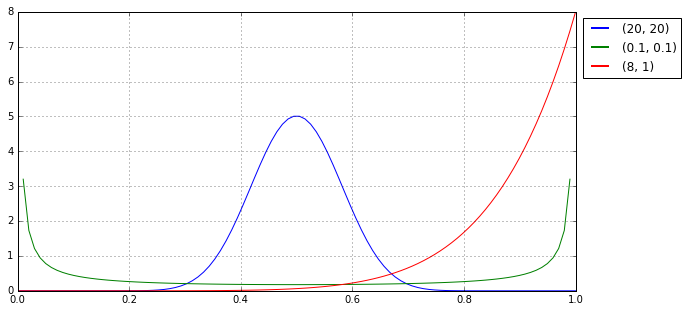

In [58]:
beta_pars = [(20, 20), (0.1, 0.1), (8, 1)]
plt.figure(figsize=(10, 5))
x = np.linspace(0, 1, 100, endpoint=True)
for par in beta_pars:
    plt.plot(x, sps.beta.pdf(x, a=par[0], b=par[1]), label=par)
plt.grid()
leg = plt.legend(bbox_to_anchor=(1.2, 1))
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)

Сравним эти байесовские оценки с оценками, полученными методом максимального правдоподобия $\overline{X}$.

In [6]:
def est_byes(a, b, sample):
    return (float(a) + sample.cumsum())  \
            / (float(a) + sample.cumsum() + b + np.arange(1, sample.size + 1) - sample.cumsum())
def est_max(sample):
    return sample.cumsum() / np.arange(1., sample.size + 1)

In [14]:
def plt_est((a, b), sample, p):
    plt.figure(figsize=(10, 5))
    x = np.arange(1, 21)
    plt.plot(x, np.abs(est_byes(a, b, sample) - p), label=(a, b))
    plt.plot(x, np.abs(est_max(sample) - p), label='$\\overline{X}$', linewidth=2.0)
    plt.grid()
    leg = plt.legend(bbox_to_anchor=(1.2, 1))
    for legobj in leg.legendHandles:
        legobj.set_linewidth(2.0)

#### Монета скорее честна.

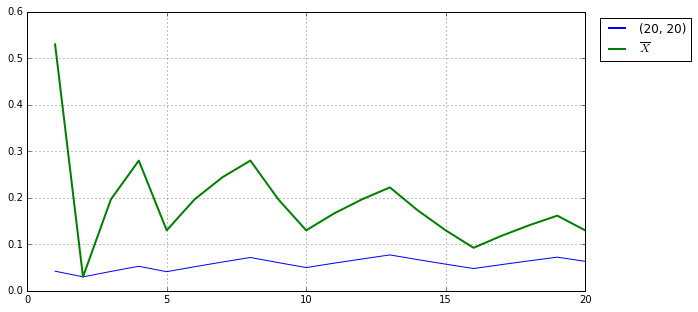

In [61]:
plt_est((20, 20), sample_1, p1)

#### Монета нечестна.

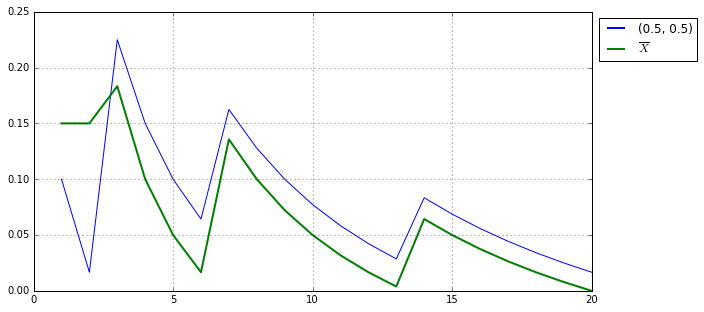

In [63]:
plt_est((0.5, 0.5), sample_2, p2)

#### Монета нечестна с перевесом в стoрону герба.

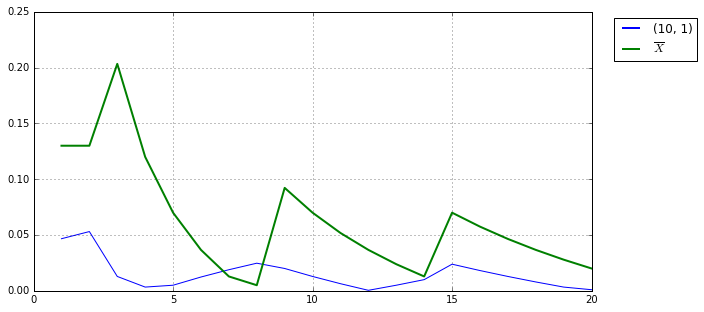

In [64]:
plt_est((10, 1), sample_3, p3)

Видим, что с некоторым априорным знанием можно получить оценку лучше, чем оценку полученную методом максимального правдоподобия. В случае честной и нечестной монеты с перевесом в сторону герба получаем оценку лучше, чем методом максимального правдоподобия. В случае нечестной монеты оценку методом максимального правдоподобия получается улучшить не всегда. Это объясняется тем, что априорное знание о монете не даёт достаточно хорошо подобрать соответствующее априорное распределение. 